# Ortodromski problem (Great circle)

**author**: *aleksander.grm@fpp.uni-lj.si*,<br>
**date**: 2022

Pri analizi ortodromske plovbe ločimo v osnovi **dva** problema
- določitev razdalje $D_O$, kurza odhoda $\omega_0$ in položaja vrha $P_v$
- določitev položajev medtočk $P_m$ za plovbo po vmesnih loksodromah

Za oba problema si poglejmo izračun parametrov. V prvem primeru določimo vse parametre ortodrome in eno vmesno točko. V drugem primeru pa izračunamo vse vmesne točke in določimo razdaljo po loksodromah. Za oba primera še izrišemo potek plovbe.

Položaje vnašama v obliki, kot je v navtiki dogovor 

$\varphi = \#\#^\circ \, \#\#.\#' \, \mathrm{N/S}$, $\lambda = \#\#\#^\circ \, \#\#.\#' \, \mathrm{E/W}$, 

kjer imamo stopinje kot celo število in minute kot število na 1 decimalno mesto natančno.

Format vnosa položaja:
- LAT-$\varphi$ in LONG-$\lambda$ vnašamo v formatu [stopinje, minute, stran neba]

Primer vnosa položaja:
- $\varphi$: [12, 34.5, 'N']
- $\lambda$: [117, 12.6, 'W']
- stran neba mora biti v **enojnih navednicah**, kjer so dovoljeni znaki 'N', 'S', 'E', 'W'

In [1]:
# Nalaganje paketi za izračun loksodromoske plovbe
import os, sys

# nav tools path
sys.path.append('../nav_tools')

# needed by basemap
# os.environ['PROJ_LIB'] = '/opt/miniconda3/envs/python/share/proj'

In [2]:
import numpy as np
import navtools as nt
import rhumbline as rl
import greatcircle as gc

### Primer 1

In [3]:
# Položaj odhoda
fi0 = [45,33.6,'N']
la0 = [25,47.7,'E']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [37,17.8,'N']
la1 = [102,27.4,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=45°33.60′N; λ=025°47.70′E
  arrival: φ=37°17.80′N; λ=102°27.40′W
----------------
distance: 5097.8Nm
  course: 321.16°
  vertex: φ=63°57.23′N; λ=034°18.73′W


In [4]:
# izračun posamezne medtočke
la_md = nt.nav2dd([50,0,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=63°05.15′N; λ=050°00.00′W


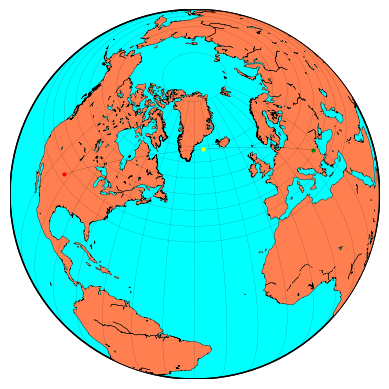

In [5]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_01.pdf')

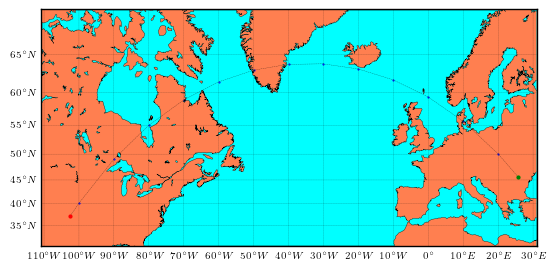

p[00]: φ=45°33.60′N; λ=025°47.70′E
p[01]: φ=50°02.68′N; λ=020°00.00′E; (0->1) ω=319.1°; d=356.2Nm
p[02]: φ=55°39.97′N; λ=010°00.00′E; (1->2) ω=313.0°; d=494.5Nm
p[03]: φ=59°23.23′N; λ=000°00.00′W; (2->3) ω=304.8°; d=391.7Nm
p[04]: φ=61°47.74′N; λ=010°00.00′W; (3->4) ω=296.1°; d=328.0Nm
p[05]: φ=63°14.06′N; λ=020°00.00′W; (4->5) ω=287.3°; d=290.0Nm
p[06]: φ=63°53.38′N; λ=030°00.00′W; (5->6) ω=278.4°; d=270.0Nm
p[07]: φ=63°50.53′N; λ=040°00.00′W; (6->7) ω=269.4°; d=264.3Nm
p[08]: φ=63°05.15′N; λ=050°00.00′W; (7->8) ω=260.4°; d=271.9Nm
p[09]: φ=61°31.66′N; λ=060°00.00′W; (8->9) ω=251.5°; d=294.0Nm
p[10]: φ=58°57.80′N; λ=070°00.00′W; (9->10) ω=242.7°; d=335.0Nm
p[11]: φ=55°01.36′N; λ=080°00.00′W; (10->11) ω=234.1°; d=403.1Nm
p[12]: φ=49°04.48′N; λ=090°00.00′W; (11->12) ω=225.9°; d=512.8Nm
p[13]: φ=40°06.66′N; λ=100°00.00′W; (12->13) ω=218.4°; d=686.1Nm
p[14]: φ=37°17.80′N; λ=102°27.40′W; (13->14) ω=214.3°; d=204.3Nm

distance-RL: 5101.9Nm; diff: 4.1Nm


In [6]:
# izris ortodrome v loksodromah
dla = 10 # vmesene točke na 5 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_01.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; ({:d}->{:d}) {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), i-1, i, nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 2

In [7]:
# Položaj odhoda
fi0 = [50,55,'N']
la0 = [7,32,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
# fi1 = [42,26,'N']
# la1 = [70,16,'W']
fi1 = [45,45,'N']
la1 = [53,24,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=50°55.00′N; λ=007°32.00′W
  arrival: φ=45°45.00′N; λ=053°24.00′W
----------------
distance: 1825.1Nm
  course: 278.45°
  vertex: φ=51°25.22′N; λ=018°22.30′W


In [8]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=48°06.71′N; λ=045°34.20′W


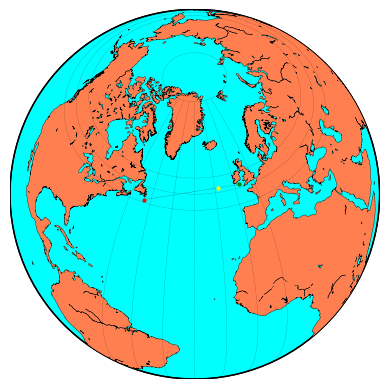

In [9]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_02.pdf')

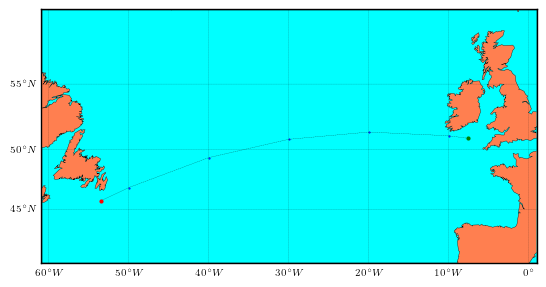

p[00]: φ=50°55.00′N; λ=007°32.00′W
p[01]: φ=51°07.25′N; λ=010°00.00′W; ω=277.5°; d=93.9Nm
p[02]: φ=51°24.55′N; λ=020°00.00′W; ω=272.6°; d=375.8Nm
p[03]: φ=50°50.39′N; λ=030°00.00′W; ω=264.8°; d=378.1Nm
p[04]: φ=49°21.98′N; λ=040°00.00′W; ω=257.1°; d=394.8Nm
p[05]: φ=46°52.03′N; λ=050°00.00′W; ω=249.5°; d=427.6Nm
p[06]: φ=45°45.00′N; λ=053°24.00′W; ω=244.6°; d=156.0Nm

distance-RL: 1826.3Nm; diff: 1.2Nm


In [10]:
# izris ortodrome v loksodromah
dla = 10 # vmesene točke na 10 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_02.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 3

Check in the opposite direction

In [11]:
# Položaj odhoda
fi0 = [45,45,'N']
la0 = [53,24,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [50,55,'N']
la1 = [7,32,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

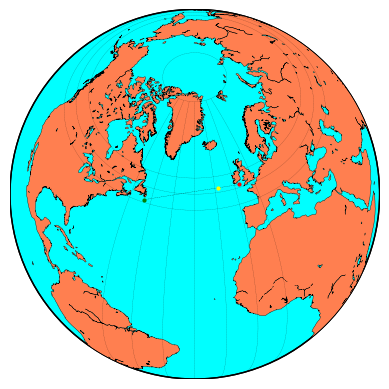

In [12]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_03.pdf')

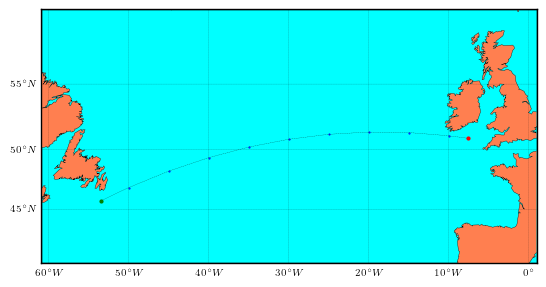

p[00]: φ=45°45.00′N; λ=053°24.00′W
p[01]: φ=46°52.03′N; λ=050°00.00′W; ω=64.6°; d=156.0Nm
p[02]: φ=48°15.34′N; λ=045°00.00′W; ω=67.6°; d=218.9Nm
p[03]: φ=49°21.98′N; λ=040°00.00′W; ω=71.4°; d=208.5Nm
p[04]: φ=50°13.31′N; λ=035°00.00′W; ω=75.2°; d=200.3Nm
p[05]: φ=50°50.39′N; λ=030°00.00′W; ω=79.0°; d=194.3Nm
p[06]: φ=51°13.98′N; λ=025°00.00′W; ω=82.9°; d=190.1Nm
p[07]: φ=51°24.55′N; λ=020°00.00′W; ω=86.8°; d=187.8Nm
p[08]: φ=51°22.32′N; λ=015°00.00′W; ω=90.7°; d=187.2Nm
p[09]: φ=51°07.25′N; λ=010°00.00′W; ω=94.6°; d=188.4Nm
p[10]: φ=50°55.00′N; λ=007°32.00′W; ω=97.5°; d=93.9Nm

distance-RL: 1825.4Nm; diff: 0.3Nm


In [13]:
# izris ortodrome v loksodromah
dla = 5 # vmesene točke na 10 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_03.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 4

Check for the Equator crossing.

In [14]:
# Položaj odhoda
fi0 = [32,33.6,'N']
la0 = [13,34.8,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [63,24.5,'S']
la1 = [72,22.3,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=32°33.60′N; λ=013°34.80′W
  arrival: φ=63°24.50′S; λ=072°22.30′W
----------------
distance: 6396.3Nm
  course: 203.55°
  vertex: φ=70°19.37′S; λ=116°46.78′W


In [15]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=42°00.63′S; λ=045°34.20′W


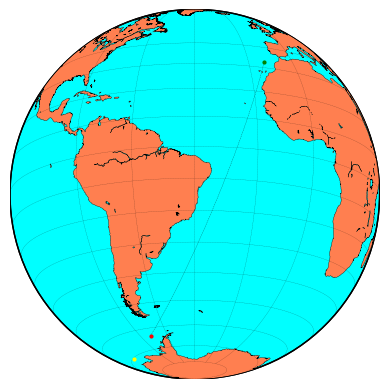

In [16]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,10,20,'gc_path_04.pdf')

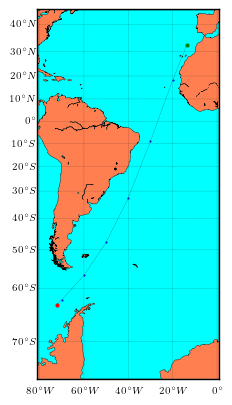

p[00]: φ=32°33.60′N; λ=013°34.80′W
p[01]: φ=18°16.14′N; λ=020°00.00′W; ω=202.0°; d=924.9Nm
p[02]: φ=08°55.66′S; λ=030°00.00′W; ω=199.9°; d=1736.0Nm
p[03]: φ=32°36.00′S; λ=040°00.00′W; ω=201.4°; d=1525.2Nm
p[04]: φ=47°47.51′S; λ=050°00.00′W; ω=206.5°; d=1018.8Nm
p[05]: φ=56°51.99′S; λ=060°00.00′W; ω=213.8°; d=655.5Nm
p[06]: φ=62°25.60′S; λ=070°00.00′W; ω=222.2°; d=450.3Nm
p[07]: φ=63°24.50′S; λ=072°22.30′W; ω=227.7°; d=87.6Nm

distance-RL: 6398.2Nm; diff: 1.9Nm


In [17]:
# izris ortodrome v loksodromah
dla = 10 # vmesene točke na 5 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,10,20,'gc_RL-path_04.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))